In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

C:\Users\yjs63\AppData\Local\Temp\ipykernel_22912\1135486040.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/취업준비/스파르타코딩/머신러닝(주피터노트북)/TeamPJT-3/train_test.csv')

In [3]:
type(df['timestamp'][0])

str

In [4]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
# timestamp : year / month / day 쪼개기

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['ttimestampp'] = df['year']+df['month']## 무슨요일인지 확인 
df['Index'] = df.index

df

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220228,2022-02-28,TG,A,J,5980.0,3608,2022,2,28,0,2024,0
1,TG_A_S_20220228,2022-02-28,TG,A,S,26209.0,3965,2022,2,28,0,2024,1
2,TG_B_J_20220228,2022-02-28,TG,B,J,5829.0,4000,2022,2,28,0,2024,2
3,TG_B_S_20220228,2022-02-28,TG,B,S,16060.0,4257,2022,2,28,0,2024,3
4,TG_C_J_20220228,2022-02-28,TG,C,J,2224.0,3987,2022,2,28,0,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,BC_D_J_20220201,2022-02-01,BC,D,J,0.0,0,2022,2,1,1,2024,1087
1088,BC_E_J_20220201,2022-02-01,BC,E,J,0.0,0,2022,2,1,1,2024,1088
1089,BC_E_S_20220201,2022-02-01,BC,E,S,0.0,0,2022,2,1,1,2024,1089
1090,CB_F_J_20220201,2022-02-01,CB,F,J,0.0,0,2022,2,1,1,2024,1090


In [6]:
Brocoly_data = df[df['item'] == 'BC']
Brocoly_data

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
28,BC_A_J_20220228,2022-02-28,BC,A,J,8904.0,2821,2022,2,28,0,2024,28
29,BC_A_S_20220228,2022-02-28,BC,A,S,3992.0,3134,2022,2,28,0,2024,29
30,BC_B_J_20220228,2022-02-28,BC,B,J,1048.0,2791,2022,2,28,0,2024,30
31,BC_B_S_20220228,2022-02-28,BC,B,S,0.0,0,2022,2,28,0,2024,31
32,BC_C_J_20220228,2022-02-28,BC,C,J,152.0,2411,2022,2,28,0,2024,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,BC_C_J_20220201,2022-02-01,BC,C,J,0.0,0,2022,2,1,1,2024,1085
1086,BC_C_S_20220201,2022-02-01,BC,C,S,0.0,0,2022,2,1,1,2024,1086
1087,BC_D_J_20220201,2022-02-01,BC,D,J,0.0,0,2022,2,1,1,2024,1087
1088,BC_E_J_20220201,2022-02-01,BC,E,J,0.0,0,2022,2,1,1,2024,1088


<Axes: xlabel='supply(kg)', ylabel='price(??kg)'>

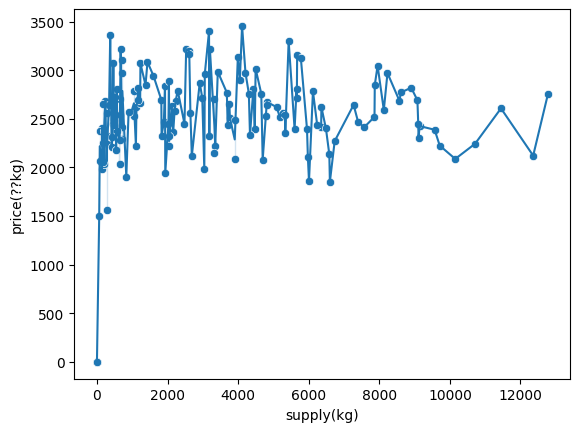

In [7]:
#Brocoly_data.plot()
plt.show()
sns.scatterplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
#plt.figure(figsize=(40,20))

0.26603157480290934 918.5011281951023
918.7671597699052


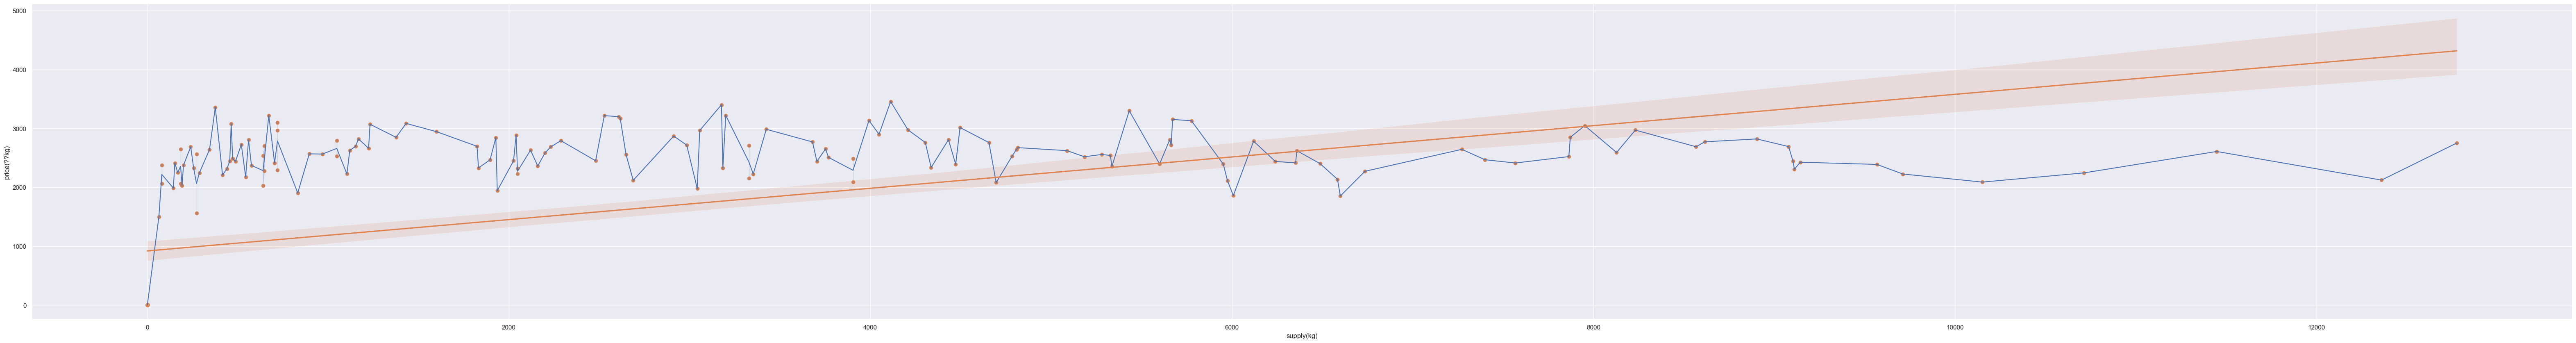

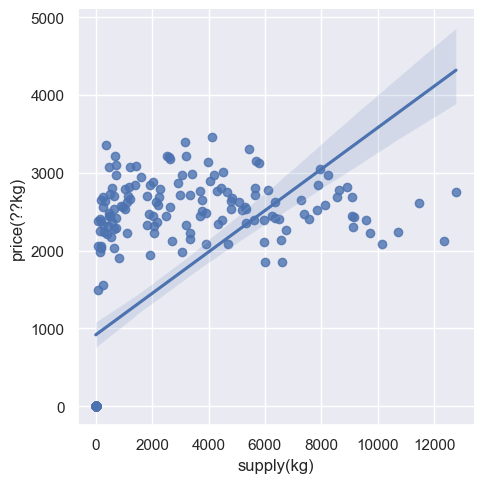

In [8]:
sns.set(rc={"figure.figsize":(80, 10)}) #width=3, #height=4
sns.scatterplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.regplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lmplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')
z=np.polyfit(Brocoly_data['supply(kg)'], Brocoly_data['price(??kg)'], 1)
f=np.poly1d(z)
print(z[0], z[1])
print(f(1))

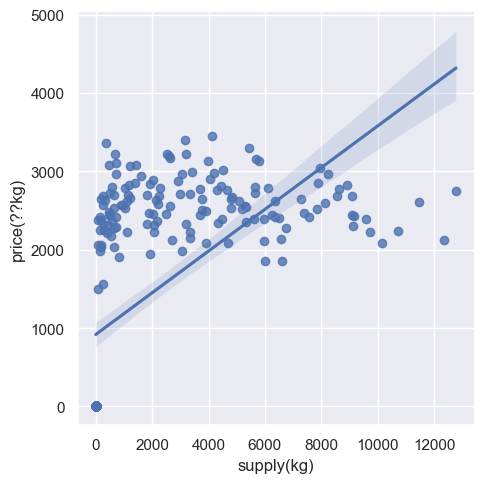

In [9]:
sns.lmplot( data = Brocoly_data, x = 'supply(kg)' , y = 'price(??kg)')

In [10]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [11]:
prsu_df = Brocoly_data[['supply(kg)', 'price(??kg)']]
model_lr.fit(Brocoly_data[['supply(kg)']], Brocoly_data['price(??kg)'])

LinearRegression()

In [12]:
y_pred = model_lr.predict(Brocoly_data[['supply(kg)']])

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Brocoly_data['price(??kg)'], y_pred)

949.8540345131967

In [14]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Brocoly_data['price(??kg)'], y_pred)

1070665.1554507113

In [15]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Brocoly_data['price(??kg)'], y_pred) 

In [16]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Brocoly_data['price(??kg)'], y_pred) 
MSE ** 0.5

1034.7295083502313

In [17]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(Brocoly_data['price(??kg)'], y_pred)

19.963279024854998

In [18]:
print(model_lr.coef_)

[0.26603157]


In [19]:
print(model_lr.intercept_)
r2_score(Brocoly_data['price(??kg)'], y_pred)
# root_mean_squared_error(Brocoly_data['price(원/kg)'], y_pred)

918.5011281951015


0.3622996454039936